## Box Office Movie: Hit or Flop?

__Author:__ [Jocaz Ayrand G. Entico](https://www.linkedin.com/in/jocaz-entico-4675b9144/)

### Executive Summary
In this notebook, we will be determining how box office movies become either a **Hit** or **Flop**. We will be using the **Ratings** and **Gross** of different movies as indicators to whether they are considered a successful movie or not. We will be implementing different machine learning regression algorithm since the variable that we are trying to predict, namely **Ratings** and **Gross**, are both continuous variable. <br>
#### Predicting the Rating of the Movie
After running the movies data set through different machine learning regression algorithm, the optimal regression model to be used is **Lasso Regression $\alpha=0.001$** with test accuracy of **37.24%**. The model uses 10 features namely *Budget, Horror Movies, Dislikes, Mind-Boggling Movies, Dark-Themed Movies, Likes, Sentiment, Views, Thriller Movies,* and *Comments* arranged in a decreasing manner of importance. We can say that genre matters in predicting the ratings of the movie.
#### Predicting the Gross Income of the Movie
After running the movies data set through different machine learning regression algorithm, the optimal regression model to be used is **Ridge Regression $\alpha=20$** with test accuracy of **79.61%**. The model uses 5 features namely *Budget, Screens, Sequel, Ratings,* and *Action Movies* arranged in a decreasing manner of importance. Generally, movies with higher budget have the higher chance of gaining higher gross income. <br>

In both cases, the top predictor variable is **Budget**. This clearly says that the alloted budget in the movie will be sufficient information to determine whether it will be a **Hit** or **Flop** movie.

### Let's Start
Let's begin by providing all the libraries to be used in this notebook.

In [80]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Data Description
The data was collected from movies databases on web as well as social media like Youtube and Twitter. The data set is composed of 12 features categorized as conventional and social media features.

In [135]:
df = pd.read_excel('2014 and 2015 CSM dataset.xlsx')
dummy = df

In [136]:
df.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


There are null entries in the data set so in order to solve this issue, we will be filling these data entries by 0.

In [33]:
df.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64

In [137]:
df = df.fillna(0)

We can also observe that the entries for the genre of the movie is in numerical value. With this manner, there will be a huge difference between movie with genre of 1 compared to movie with genre of 15 which should not be accounted since there is no specific order in movie genres. Therefore, we will be encoding the genre of the movies in a one-hot encoding manner.

In [138]:
size_mapping = {
1: 'Genre 1',
2: 'Genre 2',
3: 'Genre 3',
4: 'Genre 4',
6: 'Genre 6',
7: 'Genre 7',
8: 'Genre 8',
9: 'Genre 9',
10: 'Genre 10',
12: 'Genre 12',
15: 'Genre 15'}
df['Genre'] = df['Genre'].map(size_mapping)
df.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,Genre 8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,Genre 1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,Genre 1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,Genre 1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,Genre 8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [141]:
df = pd.concat([df, pd.get_dummies(df['Genre'])], axis=1)

In [157]:
final = df.drop('Genre', axis=1)

In [158]:
final.head()

,Movie,Year,Ratings,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,...,Genre 10,Genre 12,Genre 15,Genre 2,Genre 3,Genre 4,Genre 6,Genre 7,Genre 8,Genre 9
0,13 Sins,2014,6.3,9130,4000000.0,45.0,1,0,3280543,4632,...,0,0,0,0,0,0,0,0,1,0
1,22 Jump Street,2014,7.1,192000000,50000000.0,3306.0,2,2,583289,3465,...,0,0,0,0,0,0,0,0,0,0
2,3 Days to Kill,2014,6.2,30700000,28000000.0,2872.0,1,0,304861,328,...,0,0,0,0,0,0,0,0,0,0
3,300: Rise of an Empire,2014,6.3,106000000,110000000.0,3470.0,2,0,452917,2429,...,0,0,0,0,0,0,0,0,0,0
4,A Haunted House 2,2014,4.7,17300000,3500000.0,2310.0,2,0,3145573,12163,...,0,0,0,0,0,0,0,0,1,0


In [181]:
y_gross = final['Gross']
y_rating = final['Ratings']
X_gross = final.drop(['Gross'], axis=1).iloc[:,2:]
X_rating = final.drop(['Gross', 'Ratings'], axis=1).iloc[:,2:]

In [314]:
df_rating = final.drop(['Gross'], axis=1)
df_gross = final.drop(['Ratings'], axis=1)

### Data Exploration

We will be performing Pearson Correlation to determine the relationship of the features to the target variable.

In [184]:
S = df_rating.iloc[:,2:].corr()['Ratings']
order = S.map(lambda x : x).abs().sort_values(ascending = False)
S[order.index][abs(S[order.index]) > 0]

Ratings                1.000000
Genre 15              -0.315115
Budget                 0.285301
Dislikes              -0.187422
Genre 9                0.157259
Genre 7               -0.155490
Genre 12               0.145835
Sentiment              0.143182
Sequel                 0.105701
Screens                0.099987
Genre 8               -0.097910
Genre 2                0.081088
Likes                  0.073824
Genre 10               0.057363
Aggregate Followers    0.051321
Genre 6               -0.031960
Genre 1                0.031211
Genre 3                0.022945
Comments               0.015679
Views                  0.011710
Genre 4               -0.002777
Name: Ratings, dtype: float64

In [317]:
S = final.iloc[:,2:].corr()['Gross']
order = S.map(lambda x : x).abs().sort_values(ascending = False)
S[order.index][abs(S[order.index]) > 0]

Gross                  1.000000
Budget                 0.720595
Screens                0.596833
Sequel                 0.423711
Ratings                0.342204
Genre 1                0.327507
Aggregate Followers    0.322256
Genre 3               -0.205678
Genre 12               0.183597
Views                  0.176363
Dislikes               0.161536
Genre 8               -0.152765
Genre 2                0.147702
Comments               0.125960
Genre 10              -0.117084
Likes                  0.110432
Genre 15              -0.092823
Genre 7               -0.071702
Genre 9               -0.063064
Genre 6               -0.055265
Genre 4               -0.049694
Sentiment             -0.017100
Name: Gross, dtype: float64

Based on the results, features with result greater than 0 have direct relationship to the target variable namely **Ratings** and **Gross** while features with result less than 0 have inverse relationship to the target variable.

### Methods Function
We will be implementing three Machine Learning Regression Algorithm namely K-Nearest Neighbor Regression, Ridge Regression, and Lasso Regression. The data set will be split into two: training data and test data for the algorithm to learn and test the accuracy of the each model. We will be repeating this process by 50 trials since the splitting of the data set is determined randomly in order to remove the bias occured in splitting the data. Additionally, we will be plotting the weights of the features in predicting our target variable namely **Ratings** and **Gross**.

In [272]:
Number_trials=50
def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

        neighbors_settings = range(1,70)
        acc_train = []
        acc_test = []
            
        for n_neighbors in neighbors_settings:   
            reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
            reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
            acc_train.append(reg.score(X_train, y_train)) # record training set accuracy  
            acc_test.append(reg.score(X_test, y_test)) # record generalization accuracy    

        score_train.append(acc_train)
        score_test.append(acc_test)   
        
    score = np.mean(score_test, axis=0)
    #return n_neighbor, accuracy
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1),
            'N/A']

def train_ridge(X, y):
    score_train = []
    score_test = []
    weighted_coefs=[]
    alpha_ridge = [1e-12, 1e-10, 1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20]

    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in alpha_ridge:
            ridge = Ridge(alpha=alpha_run).fit(X_train, y_train)
            training_accuracy.append(ridge.score(X_train, y_train))
            test_accuracy.append(ridge.score(X_test, y_test))
            if alpha_run == 0.1:
                coefs = ridge.coef_
                weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs)
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,5))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        #ax.barh(np.arange(coefs_count), mean_coefs[0, np.argsort(abs_mean_coefs)])
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    ax.set_title("Ridge: Feature's Weight")
    return ['Ridge Regression', np.amax(test_accuracy), \
            'Alpha-ridge = {0}'.format(alpha_ridge[np.argmax(score)]),
            top_predictor]

def train_lasso(X, y):
    score_train = []
    score_test = []
    weighted_coefs=[]
    alpha_lasso = [1e-12, 1e-10, 1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20]

    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in alpha_lasso:
            lasso = Lasso(alpha=alpha_run,max_iter=100000).fit(X_train, y_train)
            training_accuracy.append(lasso.score(X_train, y_train))
            test_accuracy.append(lasso.score(X_test, y_test))
            if alpha_run == 0.1:
                coefs = lasso.coef_
                weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs)
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,5))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        #ax.barh(np.arange(coefs_count), mean_coefs[0, np.argsort(abs_mean_coefs)])
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    ax.set_title("Lasso: Feature's Weight")
    return ['Lasso Regression', np.amax(test_accuracy), \
            'Alpha-lasso = {0}'.format(alpha_lasso[np.argmax(score)]), 
            top_predictor]

### Feature Selection

First, we will check for the baseline test accuracy by running different regression model using all features in the given data set. Since the features have different units of measurement, we will perform standardization(mean-centering) in the data before feeding it to different regression model.

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor
0,kNN,0.104791,N_Neighbor = 11,N/A
1,Ridge Regression,0.326041,Alpha-ridge = 20,Dislikes
2,Lasso Regression,0.325705,Alpha-lasso = 0.1,Genre 15


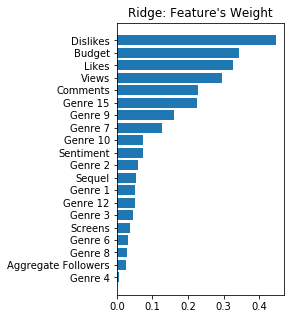

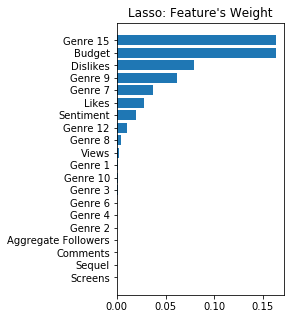

In [273]:
scale = StandardScaler()
X = X_rating
y = y_rating
X = scale.fit_transform(X)
X = pd.DataFrame(X, columns=X_rating.columns)

a = train_knn(X,y)
b = train_ridge(X,y)
c = train_lasso(X,y)
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter',
        'Top Predictor']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c

df2

Looking at the table above, the regression model with the highest test accuracy is Ridge Regression model with test accuracy of **32.6%**. Moving forward, we will be selecting the top 10 highest weighted feature for the next fitting of regression model to simplify of the model and improve the test accuracy.

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor
0,kNN,0.122695,N_Neighbor = 10,N/A
1,Ridge Regression,0.372378,Alpha-ridge = 20,Dislikes
2,Lasso Regression,0.372378,Alpha-lasso = 0.001,Budget


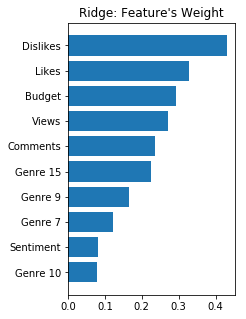

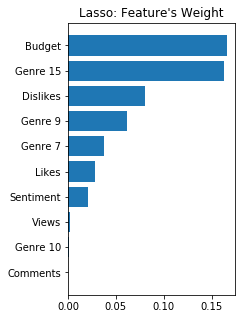

In [327]:
selected_rating = ['Dislikes', 'Budget', 'Likes', 'Views', 'Comments',
                   'Genre 15', 'Genre 9', 'Genre 7', 'Genre 10', 'Sentiment']
scale = StandardScaler()
X = X_rating[selected_rating]
dummy = X
y = y_rating
X = scale.fit_transform(X)
X = pd.DataFrame(X, columns=dummy.columns)

a = train_knn(X,y)
b = train_ridge(X,y)
c = train_lasso(X,y)
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter',
        'Top Predictor']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c

df2

The model that we will be choosing is **Lasso Regression** $\alpha=0.001$ with test accuracy of **37.24%**.

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor
0,kNN,0.458465,N_Neighbor = 20,N/A
1,Ridge Regression,0.760610,Alpha-ridge = 20,Budget
2,Lasso Regression,0.761392,Alpha-lasso = 1e-12,Budget


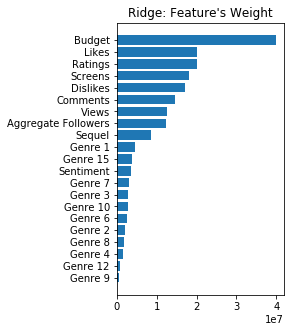

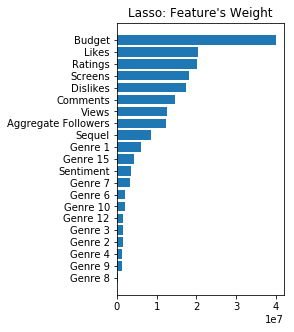

In [288]:
scale = StandardScaler()
X = X_gross
y = y_gross
X = scale.fit_transform(X)
X = pd.DataFrame(X, columns=X_gross.columns)

a = train_knn(X,y)
b = train_ridge(X,y)
c = train_lasso(X,y)
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter',
        'Top Predictor']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c

df2

Looking at the table above, the regression model with the highest test accuracy is Lasso Regression model with test accuracy of **76.14%**. Moving forward, we will be selecting the top 5 highest weighted feature in the **Correlation Analysis** for the next fitting of regression model to simplify of the model.

In [318]:
S = final.iloc[:,2:].corr()['Gross']
order = S.map(lambda x : x).abs().sort_values(ascending = False)
S[order.index][abs(S[order.index]) > 0]

Gross                  1.000000
Budget                 0.720595
Screens                0.596833
Sequel                 0.423711
Ratings                0.342204
Genre 1                0.327507
Aggregate Followers    0.322256
Genre 3               -0.205678
Genre 12               0.183597
Views                  0.176363
Dislikes               0.161536
Genre 8               -0.152765
Genre 2                0.147702
Comments               0.125960
Genre 10              -0.117084
Likes                  0.110432
Genre 15              -0.092823
Genre 7               -0.071702
Genre 9               -0.063064
Genre 6               -0.055265
Genre 4               -0.049694
Sentiment             -0.017100
Name: Gross, dtype: float64

The features that we selected are *Budget, Screens, Sequel, Ratings* and *Action Movies*.

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor
0,kNN,0.516475,N_Neighbor = 11,N/A
1,Ridge Regression,0.796082,Alpha-ridge = 20,Budget
2,Lasso Regression,0.792738,Alpha-lasso = 20,Budget


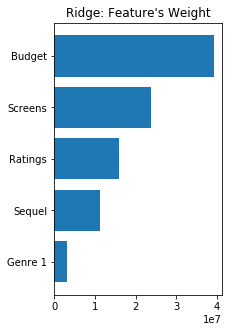

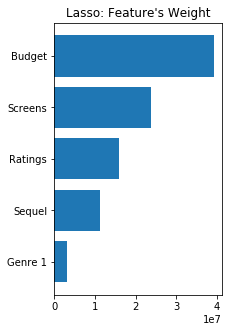

In [329]:
selected_gross = ['Budget', 'Screens', 'Sequel', 'Ratings', 'Genre 1']
scale = StandardScaler()
X = X_gross[selected_gross]
dummy = X
y = y_gross
X = scale.fit_transform(X)
X = pd.DataFrame(X, columns=dummy.columns)

a = train_knn(X,y)
b = train_ridge(X,y)
c = train_lasso(X,y)
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter',
        'Top Predictor']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c

df2

The model that we will be choosing is **Ridge Regression** $\alpha=20$ with test accuracy of **79.61%**.

### Result and Discussion
**Ratings Predictive Model** <br>
The model that we will be choosing is Lasso Regression $\alpha=0.001$ with test accuracy of **37.24%** using 10 features. With this result, audience generally don't like horror movies since movie with a genre of horror has a tendency of having a lower ratings compared to others. On the other hand, mind-boggling movies have the tendency of getting higher ratings. Additionally, the number of dislikes comes first followed by the budget of the film for the top predictor of ratings. <br>
**Gross Income Predictive Model** <br>
The model that we will be choosing is Ridge Regression $\alpha=20$ with test accuracy of **79.61%** using 5 features namely Budget, Screens, Sequel, Ratings, and Action Movies. In conclusion, movies with higher budget have a tendency of gaining higher gross income. Additionally, movies that have more number of screens have higher gross income compared to others. Lastly, Action Movies generally have high gross income based on the results of the predictive model.

#### Recommendation
If you are planning to produce/direct a movie, you need to consider these variables, **Budget, Ratings,** and **Plot of the Movie**, in order for the film to be a box office hit. Moreover, **Ratings** are usually determined based on the genre of the movie and we observed that *Horror Movies* tend to have lower ratings compared to others. In effect, if you are planning to make a *Horror Movie*, be sure to improve the other variables stated earlier for it to be successful. In both predicting the **Ratings** and **Gross Income**, the top predictor variable is **Budget**. This clearly says that the alloted **Budget** in the movie will be sufficient information to determine whether it will be a **Hit** or **Flop** movie.

### References
- Monterola, Chris. Linear Regression.ipynb. Asian Institute of Management 2018